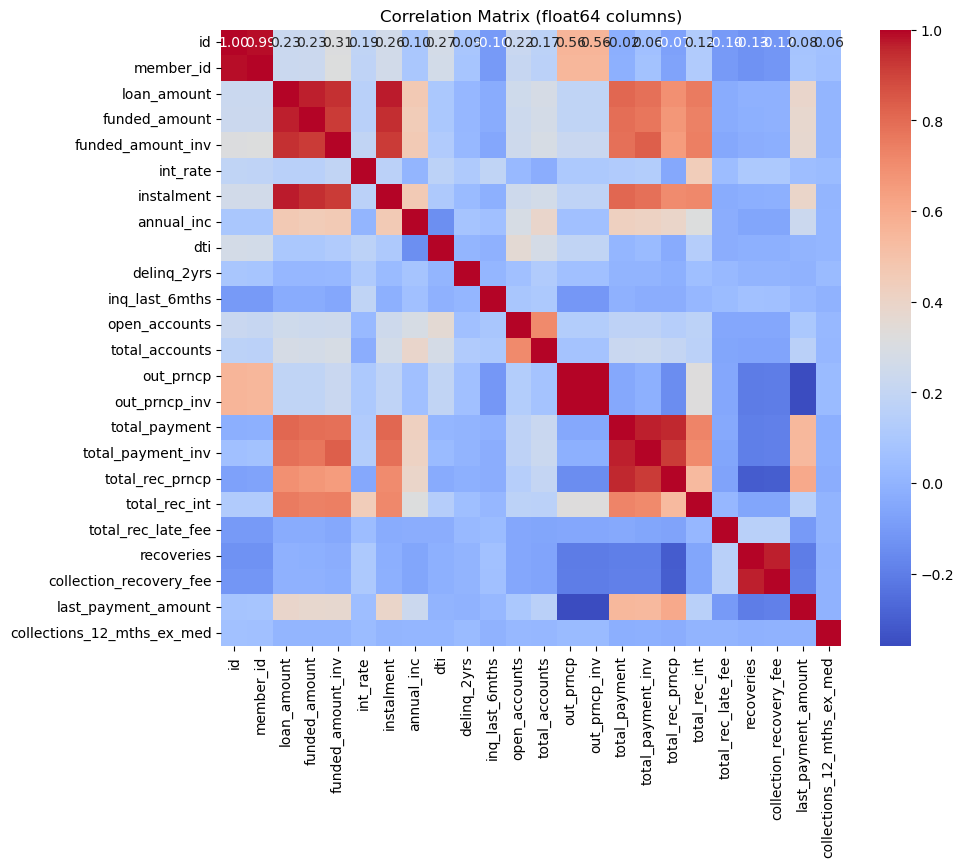

Removed highly correlated columns: {'out_prncp_inv', 'total_rec_prncp', 'collection_recovery_fee', 'total_payment_inv', 'member_id', 'instalment'}
Transformed data saved to: C:/Users/admin/EDA - Customer Loans/final_data.csv


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class DataFrameTransform:
    @staticmethod
    def remove_highly_correlated_columns(dataframe, correlation_threshold=0.8):
        # Exclude 'object' columns from correlation analysis
        float_columns = dataframe.select_dtypes(include=['float64'])
        
        correlation_matrix = float_columns.corr()

        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title("Correlation Matrix (float64 columns)")
        plt.show()

        # Identify highly correlated columns
        correlated_columns = set()
        for i in range(len(correlation_matrix.columns)):
            for j in range(i):
                if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
                    colname = correlation_matrix.columns[i]
                    correlated_columns.add(colname)

        # Remove highly correlated columns, excluding 'funded_amount' and 'funded_amount_inv'
        correlated_columns.discard('funded_amount')
        correlated_columns.discard('funded_amount_inv')
        correlated_columns.discard('total_payment')
        dataframe_no_correlation = dataframe.copy()  # Make a copy to keep the original data
        dataframe_no_correlation = dataframe_no_correlation.drop(columns=correlated_columns)

        return dataframe_no_correlation

data_path = 'C:/Users/admin/EDA - Customer Loans/transformed_data_after_skew.csv'
data = pd.read_csv(data_path)

# Create an instance of DataFrameTransform
transformer = DataFrameTransform()

# Remove highly correlated float64 columns (excluding 'funded_amount' and 'funded_amount_inv')
data_no_correlation_float64 = transformer.remove_highly_correlated_columns(data)

# Print the columns removed
removed_columns = set(data.columns) - set(data_no_correlation_float64.columns)
print(f"Removed highly correlated columns: {removed_columns}")

final_data_path = 'C:/Users/admin/EDA - Customer Loans/final_data.csv'
data_no_correlation_float64.to_csv(final_data_path, index=False)
print(f"Transformed data saved to: {final_data_path}")
